# En introduktion till DFT
### Av Martin Gulliksson och John Daniel Bossér

DFT står för Density Functional Theory, på svenska täthetsfunktionalteori, och används för att beräkna grundtillstånd för flerelektronsystem. 


Att räkna kvantmekaniskt på flerelektronssytem är svårt. För att göra det göra beräkningarna lättare
görs tre förenklingar i DFT:

 * **Born-Oppenheimer approximationen**: 
 
   Vågfunktionen för en atom kan med god noggrannhet separeras i två delar, en för atomkärnan och en
   för elektronerna kring kärnan 
   
$$\begin{equation*}
   \Psi_\text{atom} \approx \Psi_\text{atomkärna} \cdot \Psi_\text{elektroner}.
\end{equation*}$$
   
   Med denna uppdelning är det möjligt att lösa vågfunktionen för elektronerna oberoende av atomkärnans rörelse. 
   Detta kan motiveras med att atomkärnor har mycket större massa än elektroner och de rör sig därför
   med olika tidsskalor. I fortsättningen kommer $\Psi_\text{elektroner}$ kallas enbart $\Psi$.

 * **Ersätt elektronväxelverkan med potentialterm**:
 
   En ytterligare förenkling av problemet är att elektronerna ersätts av teoretiska icke-interagerande partiklar. Vågfunktionen $\Psi(x_1, ..., x_N)$ för de $N$ antal elektronerna kan då delas upp i $N$ antal ortogonala vågfunktioner $\psi_i(x_i)$, en för varje elektron. På detta sätt kan vågfunktionen för varje elektron lösas var för sig, oberoende av de andra elektronerna. För att uppdelningen ska uppfylla Pauliprincipen måste den anta formen

$$\begin{equation*}
    \Psi = \frac{1}{\sqrt{N \text{!}}} \left| \begin{matrix}
        \psi_1(\vec{x_1}) & \psi_2(\vec{x_1}) & \dots & \psi_N(\vec{x_1}) \\
        \psi_1(\vec{x_2}) & \psi_2(\vec{x_2}) & \dots & \psi_N(\vec{x_2}) \\
        \vdots & \vdots & \ddots & \vdots \\
        \psi_1(\vec{x_N}) & \psi_2(\vec{x_N}) & \dots & \psi_N(\vec{x_N}) \\
    \end{matrix} \right|,
\end{equation*}$$

  där $\vec{x}_i$ är rums- och spinnkoordinaterna för partikel $i$. Detta motiveras mer på sidan om [beräkning av elektrontäthet](electron-density.html). Dessa teoretiska partiklar benämns _Kohn-Sham-partiklar_, och beter sig precis som vanliga elektroner med undantaget för växelverkan sinsemellan. För att Kohn-Sham-partiklarna ska bete sig likt elektroner införs en extra term i potentialen som approximativt kompenserar avsaknaden av växelverkan. 

 * **Uttryck problemet i termer av elektrontäthet**:

 Att uttrycka problemet i termer av elektrontätheten $n(\vec{r})$ förenklar problemet avsevärt, eftersom antalet 
 koordinater reduceras från tre per elektron till totalt tre. Alla potentialer och energier kan uttryckas som 
 funktional av elektrontätheten, och är enligt _Första Hohenberg-Kohn-teoremet_  ekvivalent med att uttrycka
 dem i termer av vågfunktioner. Hur elektrontätheten beräknas
 från elektronernas vågfunktioner specificeras på sidan [beräkning av elektrontäthet](electron-density.html). 

Utifrån dessa förenklingar kan Schrödingerekvationen för varje Kohn-Sham-partikel skrivas om som ett egenvärdesproblem som kallas _Kohn-Shams ekvation_

$$\begin{equation}
    \label{eq:kohn}
    \left[-\frac{1}{2}\nabla^2 + V_\text{eff}(\vec{r}) \right] \psi_i(\vec{r}) = \varepsilon_i \psi_i(\vec{r}),
\end{equation}$$

där $\varepsilon_i$ är energiegenvärden och $V_\text{eff}$ den _effektiva potentialen_ som respektive Kohn-Sham-partikel upplever. Beräkningsalgoritmen, som kallas _Hartree–Fock-metoden_, bygger på att upprepade gånger lösa denna ekvation. Varje enskilt steg förklaras och motiveras i de nästkommande kapitlen. En visualisering av tillvägagångssättet visas i figuren nedan, och kan sammanfattas i 6 steg:

<img src="../Assets/SCF_varm.svg" alt="Drawing" style="width:50%;"/>

1. Systemet diskretiseras i rummet och en inledande gissning av vågfunktionerna $\psi_i^{(0)}$ ställs upp.

2. [I varje punkt beräknas elektrontätheten](electron-density.html) $n(\vec{r})^{(0)}$.

3. Från den beräknade elektrontätheten $n(\vec{r})^{(0)}$ [utvärderas den effektiva potentialen](energibidrag.html) $V_\text{eff}$ 
   och [systemets totala energi](total_energy.html) $E[n]$.

4. [Kohn-Shams ekvation](kohn-sham.html) löses med hjälp av $V_\text{eff}$, vilket ger nya elektronorbitaler 
   $\psi_i^{(1)}$.

5. De nya elektronorbitalerna används i steg 2 för att hitta $n(\vec{r})^{(1)}$ och den tillhörande 
   energin $E[n]$, och processen upprepas.

6. Om skillnaden i total energi $E[n]$ mellan två iterationer är mindre än något bestämt 
   tröskelvärde stoppas programmet. Grundtillståndsenergin $E[n(\vec{r})^{(\text{final})}]$ 
   och grundtillståndselektronorbitalerna $\psi_i^{(\text{final})}$ är nu beräknade med 
   den önskade noggrannheten.

I denna notebook presenteras ett exempel på DFT implementerat i Python för att beräkna grundtillståndet för helium. Helium är ett flerelektronsystem som är sfäriskt symmetriskt, vilket förenklar implementationen. 

Notebooken innehåller följande artiklar
 * [Teoriavsnitt om energibidrag och uppdelning av effektiva potentialen](energibidrag.html)
     * [Uträkning av externt potentialbidrag](Extern-potential.html)
     * [Uträkning av Hartreepotential](hartreepotential.html)
     * [Uträkning av exchange correlation-bidrag med LDA](exchange-correlation.html)
 * [Lösning av Kohn-Shams ekvation med effektiv potential](kohn-sham.html)
 * [Uträkning av total energi för systemet](total_energy.html)
 
Denna notebook är skrivet i pedagogiskt syfte. Förhoppningen är att en läsare skall, med hjälp av denna notebook, kunna implementera DFT i sitt egna program. 

Efter att ha gjort en implementation i Python har följande main-loop konstruerats. 

Calculating helium ground state...
Ground state energy = -2.75246590242


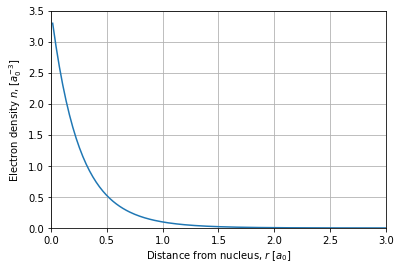

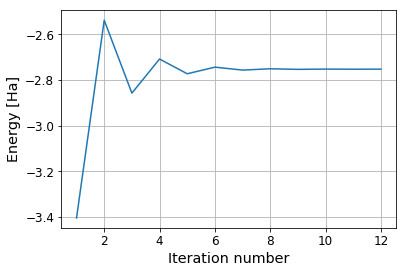

In [1]:
%matplotlib inline 

#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
#  heliumdft.py
#
#  Copyright 2018 Martin Gulliksson <martin@martingulliksson.com>
#             and John Daniel Bossér <john.daniel@bosser.com>
#
#  This program is free software; you can redistribute it and/or modify
#  it under the terms of the GNU General Public License as published by
#  the Free Software Foundation; either version 2 of the License, or
#  (at your option) any later version.
#
#  This program is distributed in the hope that it will be useful,
#  but WITHOUT ANY WARRANTY; without even the implied warranty of
#  MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#  GNU General Public License for more details.
#
#  You should have received a copy of the GNU General Public License
#  along with this program; if not, write to the Free Software
#  Foundation, Inc., 51 Franklin Street, Fifth Floor, Boston,
#  MA 02110-1301, USA.
#
#
import numpy as np
import matplotlib.pyplot as plt
from components.misc import get_n
from components.hartree import get_hartree_potential
from components.xc import get_V_x, get_V_xc, get_V_xc_Vosko
from components.kohnsham import solve_ks

max_iterations = 12

## 1. Sample space in radius from nucleus.
r_max = 15
r_step = 0.015
r = np.arange(0, r_max, r_step)

## 1. Make an initial guess for the wave function. 
psi = 1 / np.sqrt(np.pi) * np.exp(-r)
      
Z = 2                   # Number of protons in nucleus
E_vec = []              # Calculated energies in each iteration

## Conditions for exiting the program
tolerance = 1e-7

print("Calculating helium ground state...") 

# Loop/run the program until conditions are met. 
while len(E_vec) < 2 or (abs(E_vec[-1] - E_vec[-2]) > tolerance and len(E_vec) < max_iterations):
    # 2. Get the density in every point in space
    n = get_n(psi)
    
    # 3. Get potential terms
    V_sH = get_hartree_potential(r, n)
    V_H = 2 * V_sH
    V_xc = get_V_xc_Vosko(n)

    # 4 and 5. Solve Kohn-Sham and get total energy. 
    E, psi = solve_ks(r, Z, V_H, V_xc)
    
    # Add calculated energy to list
    E_vec.append(E)
    
print("Ground state energy =", E_vec[-1])

## Calculate electron densities
n = get_n(psi)

## Plot electron densities
plt.grid()
plt.xlabel("Distance from nucleus, $r$ [$a_0$]")
plt.ylabel("Electron density $n$, [$a_0^{-3}$]")
plt.plot(r[1:], n[1:])
plt.axis([0,3, 0, 3.5])
plt.show()

## Plot the calculated energies for every iteration in Hartree-Fock loop. 
## Does it converge? ;)
plt.grid()
plt.xlabel("Iteration number", fontsize='x-large')
plt.ylabel("Energy [Ha]", fontsize='x-large')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
x = np.arange(1, len(E_vec) + 1)
plt.plot(x, E_vec)
plt.show()

Programmet möjliggjorde undersökning av heliums grundtillståndsenergi uträknat med respektive utan LDA. I tabellen nedan presenteras beräknad totala energi för några iterationssteg för de två implementationerna

| Iterationsnummer | 1     | 2     | 3     | ... | 7     | ... | 13    |
|------------------|-------|-------|-------|-----|-------|-----|-------|
| Med LDA [Ha]     | -3,40 | -2,52 | -2,87 | ... | -2.75 | ... | -2.75 |
| Utan LDA [Ha]    | -3.18 | -2,78 | -2,88 | ... | -2,86 | ... | -2,86 |

Exmperimentellt har man visat att heliums grundtillståndsenergi är -2,9 Ha. Från tabellen framgår det att LDA är en dålig uppskattning av exchange correlation-bidragen till heliums grundtillståndsenergi. Detta beror troligtvis på att elektronmolnet i helium inte kan approximeras som en homogen elektrongas. Vidare ger LDA upphov till __självinteraktionsfel__, vilket innebär att elektronerna uppskattas interagera med sig själva. Självinteraktionen beror på att LDA enbart tar hänsyn till elektrontätheten $n$. Exempelvis erhålles nollskillda  $n$ och $E_\text{xc}$ i enelektronsystem med LDA.

LDA användes för den enkla implementationen eftersom metoden är förhållandevis simpel att förklara och tillämpa. Bristerna hos LDA är kända och resultaten som erhölls är därför inte förvånande.